In [10]:
# Make Jupyter Notebook full screen - White space is for chumps and people with a sense of style

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [11]:
# Import things you need: (Keep piling every week - Latex style, just carry through the same laundry list)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import plotly.express as px
from chart_studio.plotly import plot as py
import os
import math
import csv
from datetime import datetime
from datetime import timedelta
import random
import time
import pandas as pd
from shapely.geometry import Polygon, Point
import geopandas
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib
from matplotlib.lines import Line2D

In [12]:
# fancy matplotlib things:

%matplotlib inline
font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 18}
plt.rc('font', **font)
font1 = {'family': 'serif', 'weight': 'bold', 'size': 20, }
font2 = {'family': 'serif', 'weight': 'normal', 'size': 16, }

In [14]:
ridership = pd.read_csv('Metro_Transit_Ridership_by_Route_Weekday.csv', sep=",")

In [38]:
trips = pd.read_csv('mmt_gtfs/trips.txt', sep=",")

In [39]:
trips

,route_id,route_short_name,service_id,trip_id,trip_headsign,direction_id,direction_name,block_id,shape_id,shape_code,trip_type,trip_sort,wheelchair_accessible,bikes_allowed
0,8380,1,86_WKD,884475,CAPITOL SQUARE,0,Capitol Square,183766,51362,1E,NaN,35820,1,1
1,8380,1,86_WKD,884474,CAPITOL SQUARE,0,Capitol Square,183765,51362,1E,NaN,39420,1,1
2,8380,1,86_WKD,884473,CAPITOL SQUARE,0,Capitol Square,183766,51362,1E,NaN,43020,1,1
3,8380,1,86_WKD,884472,CAPITOL SQUARE,0,Capitol Square,183765,51362,1E,NaN,46620,1,1
4,8380,1,86_WKD,884471,CAPITOL SQUARE,0,Capitol Square,183766,51362,1E,NaN,50220,1,1
5,8380,1,86_WKD,884470,CAPITOL SQUARE,0,Capitol Square,183765,51362,1E,NaN,53820,1,1
6,8380,1,86_WKD,884481,OLD UNIV AV: VIA CAMPUS,1,Old University,183766,51363,1W,NaN,34560,1,1
7,8380,1,86_WKD,884480,OLD UNIV AV: VIA CAMPUS,1,Old University,183765,51363,1W,NaN,38160,1,1
8,8380,1,86_WKD,884479,OLD UNIV AV: VIA CAMPUS,1,Old University,183766,51363,1W,NaN,41760,1,1
9,8380,1,86_WKD,884478,OLD UNIV AV: VIA CAMPUS,1,Old University,183765,51363,1W,NaN,45360,1,1


In [15]:
ridership

,X,Y,OBJECTID,StopID,Route,Lat,Lon,DailyBoardings,DotSize
0,-89.326700,43.097844,17341,1270,3,43.097852,-89.326706,2.67,26747.00
1,-89.326700,43.097844,17342,1270,16,43.097852,-89.326706,1.68,16755.03
2,-89.326700,43.097844,17343,1270,31,43.097852,-89.326706,1.34,13370.22
3,-89.355095,43.106618,17344,1278,27,43.106626,-89.355101,0.17,1666.67
4,-89.355095,43.106618,17345,1278,29,43.106626,-89.355101,2.19,21875.00
5,-89.345539,43.102870,17346,1280,4,43.102878,-89.345545,21.99,219890.91
6,-89.345539,43.102870,17347,1280,6,43.102878,-89.345545,31.42,314238.09
7,-89.345539,43.102870,17348,1280,25,43.102878,-89.345545,1.17,11666.67
8,-89.348296,43.100079,17349,1293,5,43.100087,-89.348302,13.22,132217.37
9,-89.348296,43.100079,17350,1293,14,43.100087,-89.348302,2.67,26676.17


In [72]:
Data = {}
for i in ridership.iterrows():
    if i[1]['Route'] not in Data:
        Data[i[1]['Route']] = [0, 0]
    Data[i[1]['Route']][0] = Data[i[1]['Route']][1] + i[1]['DailyBoardings']
    Data[i[1]['Route']][1] = Data[i[1]['Route']][1] + 1
    

In [76]:
Data

{3.0: [130.17, 131],
 16.0: [75.17, 75],
 31.0: [45.17, 46],
 27.0: [76.33, 77],
 29.0: [51.66, 45],
 4.0: [115.54, 111],
 6.0: [203.17, 203],
 25.0: [27.33, 22],
 5.0: [101.22, 89],
 14.0: [122.33, 123],
 15.0: [164.84, 165],
 2.0: [130.19, 120],
 10.0: [128.34, 128],
 56.0: [120.67, 120],
 57.0: [101.0, 98],
 38.0: [134.35, 134],
 17.0: [19.509999999999998, 15],
 11.0: [95.5, 85],
 12.0: [85.7, 53],
 37.0: [75.5, 76],
 47.0: [73.17, 74],
 58.0: [82.68, 81],
 70.0: [122.69, 112],
 71.0: [117.55, 89],
 72.0: [120.77, 101],
 1.0: [29.51, 29],
 19.0: [95.37, 88],
 75.0: [53.75, 38],
 28.0: [91.0, 86],
 22.0: [276.73, 36],
 81.0: [32.83, 32],
 34.0: [23.34, 24],
 20.0: [57.01, 51],
 21.0: [242.33, 37],
 44.0: [58.67, 59],
 80.0: [409.58, 48],
 84.0: [57.5, 5],
 48.0: [23.83, 24],
 67.0: [257.18, 27],
 18.0: [83.34, 84],
 50.0: [41.4, 33],
 51.0: [39.83, 39],
 52.0: [20.85, 19],
 55.0: [19.02, 18],
 40.0: [42.34, 41],
 49.0: [32.17, 33],
 73.0: [220.08, 68],
 32.0: [49.72, 50],
 35.0: [63.

In [29]:
dataNorm = {}
for i in Data:
    averageRiderPerStopWeekday = Data[i][0]/Data[i][1]
    dataNorm[i] = averageRiderPerStopWeekday

In [77]:
dataNorm

{3.0: 0.9936641221374045,
 16.0: 1.0022666666666666,
 31.0: 0.9819565217391305,
 27.0: 0.9912987012987012,
 29.0: 1.148,
 4.0: 1.040900900900901,
 6.0: 1.0008374384236454,
 25.0: 1.2422727272727272,
 5.0: 1.1373033707865168,
 14.0: 0.9945528455284552,
 15.0: 0.999030303030303,
 2.0: 1.0849166666666668,
 10.0: 1.00265625,
 56.0: 1.0055833333333333,
 57.0: 1.030612244897959,
 38.0: 1.0026119402985074,
 17.0: 1.3006666666666666,
 11.0: 1.1235294117647059,
 12.0: 1.6169811320754717,
 37.0: 0.993421052631579,
 47.0: 0.9887837837837838,
 58.0: 1.0207407407407407,
 70.0: 1.0954464285714285,
 71.0: 1.3207865168539326,
 72.0: 1.1957425742574257,
 1.0: 1.0175862068965518,
 19.0: 1.08375,
 75.0: 1.4144736842105263,
 28.0: 1.058139534883721,
 22.0: 7.686944444444445,
 81.0: 1.0259375,
 34.0: 0.9725,
 20.0: 1.117843137254902,
 21.0: 6.5494594594594595,
 44.0: 0.994406779661017,
 80.0: 8.532916666666667,
 84.0: 11.5,
 48.0: 0.9929166666666666,
 67.0: 9.525185185185185,
 18.0: 0.9921428571428572,
 50

In [34]:
dataNorm[34.0]

0.9725

In [35]:
dataNorm[36.0]

0.917

In [42]:
Data = {}
for i in trips.iterrows():
    if i[1]['route_short_name'] not in Data:
        Data[i[1]['route_short_name']] = 0
    Data[i[1]['route_short_name']] = Data[i[1]['route_short_name']] + 1

In [43]:
Data

{1: 24,
 2: 610,
 3: 144,
 4: 339,
 5: 337,
 6: 417,
 10: 268,
 11: 29,
 12: 24,
 13: 304,
 14: 102,
 15: 128,
 16: 323,
 17: 518,
 18: 552,
 19: 86,
 20: 511,
 21: 180,
 22: 197,
 25: 4,
 26: 248,
 27: 28,
 28: 72,
 29: 8,
 30: 523,
 31: 245,
 32: 120,
 33: 30,
 34: 22,
 35: 32,
 36: 164,
 37: 62,
 38: 82,
 39: 24,
 40: 171,
 44: 28,
 47: 44,
 48: 12,
 49: 20,
 50: 174,
 51: 135,
 52: 82,
 55: 42,
 56: 40,
 57: 44,
 58: 30,
 67: 198,
 70: 58,
 71: 38,
 72: 42,
 73: 98,
 75: 48,
 7: 416,
 8: 199,
 59: 202,
 63: 209,
 68: 204,
 78: 99,
 80: 1228,
 84: 28,
 81: 256,
 82: 260,
 23: 14}

In [49]:
Normalized = {}
for i in dataNorm:
    for j in Data:
        if int(i) == int(j):
            Normalized[j] = dataNorm[i]/Data[j]

In [50]:
Normalized

{3: 0.006900445292620865,
 16: 0.0031029927760577915,
 31: 0.004007985803016859,
 27: 0.03540352504638219,
 29: 0.1435,
 4: 0.0030705041324510353,
 6: 0.002400089780392435,
 25: 0.3105681818181818,
 5: 0.0033747874504050945,
 14: 0.009750518093416228,
 15: 0.0078049242424242425,
 2: 0.0017785519125683063,
 10: 0.003741254664179105,
 56: 0.025139583333333333,
 57: 0.023423005565862708,
 38: 0.012226974881689116,
 17: 0.002510939510939511,
 11: 0.03874239350912779,
 12: 0.06737421383647799,
 37: 0.016022920203735146,
 47: 0.022472358722358723,
 58: 0.03402469135802469,
 70: 0.01888700738916256,
 71: 0.03475753991720875,
 72: 0.028470061291843467,
 1: 0.042399425287356324,
 19: 0.012601744186046511,
 75: 0.029468201754385966,
 28: 0.01469638242894057,
 22: 0.0390200225606317,
 81: 0.004007568359375,
 34: 0.044204545454545455,
 20: 0.002187559955489045,
 21: 0.036385885885885885,
 44: 0.03551452784503632,
 80: 0.006948629207383279,
 84: 0.4107142857142857,
 48: 0.08274305555555554,
 67: 0.

In [52]:
x = []
y = []
for i in Normalized:
    x.append(int(i))
    y.append(Normalized[i])

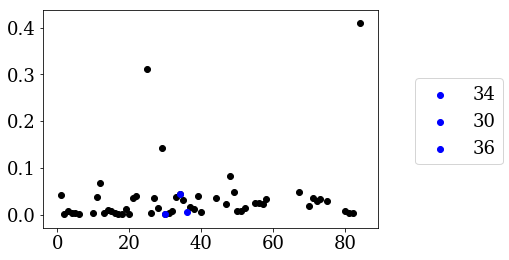

In [70]:
for i in Normalized:
    if i == 30:
        plt.scatter(int(i), Normalized[i], c='b', label='30', zorder=2)
    if i == 34:
        plt.scatter(int(i), Normalized[i], c='b', label='34', zorder=2)
    if i == 36:
        plt.scatter(int(i), Normalized[i], c='b', label='36', zorder=2)
    else:
        plt.scatter(int(i), Normalized[i], c='k')
        
plt.legend(loc='lower right', bbox_to_anchor=(1.40, .25))
plt.show()

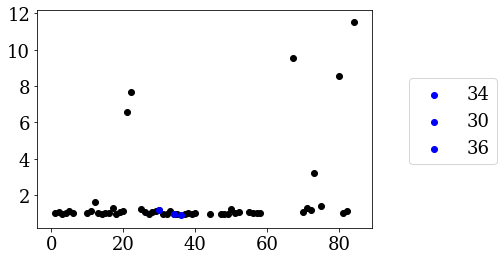

In [79]:
for i in dataNorm:
    if i == 30:
        plt.scatter(int(i), dataNorm[i], c='b', label='30', zorder=2)
    if i == 34:
        plt.scatter(int(i), dataNorm[i], c='b', label='34', zorder=2)
    if i == 36:
        plt.scatter(int(i), dataNorm[i], c='b', label='36', zorder=2)
    else:
        plt.scatter(int(i), dataNorm[i], c='k')
        
plt.legend(loc='lower right', bbox_to_anchor=(1.40, .25))
plt.show()